In [2]:
# Load packages
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np

c:\Users\PhD4Ever\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Device configuration
print(torch.__version__) 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')
#device = torch.device('cuda:0')
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.device(0))

1.12.1
True
NVIDIA GeForce RTX 2060
1
0


In [4]:
# Hyper-parameters
num_epochs = 30
batch_size = 1
learning_rate = 0.001

In [5]:
data_dir = 'fishes'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [6]:
# Define transforms for the training, validation, and testing sets

training_transforms = transforms.Compose([transforms.RandomRotation(30),
                                          transforms.RandomResizedCrop(224),  #224
                                          transforms.RandomHorizontalFlip(),
                                          transforms.ToTensor(),
                                          transforms.Normalize([0.485, 0.456, 0.406], 
                                                               [0.229, 0.224, 0.225])])

validation_transforms = transforms.Compose([transforms.Resize(256),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406], 
                                                                 [0.229, 0.224, 0.225])])

testing_transforms = transforms.Compose([transforms.Resize(256),
                                         transforms.CenterCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485, 0.456, 0.406], 
                                                              [0.229, 0.224, 0.225])])


# TODO: Load the datasets with ImageFolder
training_dataset = datasets.ImageFolder(train_dir, transform=training_transforms)
validation_dataset = datasets.ImageFolder(valid_dir, transform=validation_transforms)
testing_dataset = datasets.ImageFolder(test_dir, transform=testing_transforms)

# TODO: Using the image datasets and the trainforms, define the dataloaders
train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=True)  # batch_size=64
validate_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size)           # batch_size=32
test_loader = torch.utils.data.DataLoader(testing_dataset, batch_size=batch_size)                  # batch_size=32

classes = ('Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass','Shrimp','Striped Red Mullet', 'Trout')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


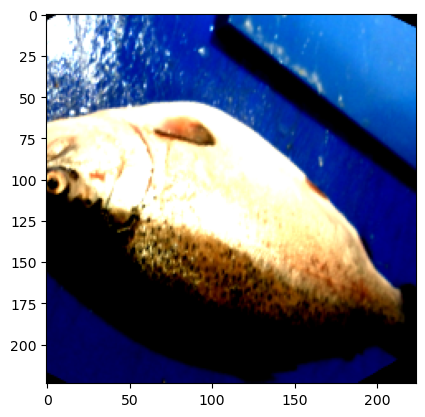

tensor([8])


In [7]:
# Randomly Show the database
def imshow(img):
    img = img / 2+0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()


imshow(torchvision.utils.make_grid(images))
print(labels)

In [8]:
# Check for dimensions
conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16 , 5)
print(images.shape)
x = conv1(images)
print(x.shape)
x = pool(x)
print(x.shape)
x = conv2(x)
print(x.shape)
x = pool(x)
print(x.shape)

torch.Size([1, 3, 224, 224])
torch.Size([1, 6, 220, 220])
torch.Size([1, 6, 110, 110])
torch.Size([1, 16, 106, 106])
torch.Size([1, 16, 53, 53])


In [9]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #3 color channels    3 6 5
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)                   # 6 16 5
        self.fc1 = nn.Linear(16*53*53, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 9) #9 classes


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x =x.view(-1, 16*53*53)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)

Epoch [1/30], Step [1166/5830], Loss: 2.0740
Epoch [1/30], Step [2332/5830], Loss: 2.2107
Epoch [1/30], Step [3498/5830], Loss: 1.7239
Epoch [1/30], Step [4664/5830], Loss: 1.0980
Epoch [1/30], Step [5830/5830], Loss: 2.4748
Epoch [2/30], Step [1166/5830], Loss: 1.9756
Epoch [2/30], Step [2332/5830], Loss: 0.0639
Epoch [2/30], Step [3498/5830], Loss: 3.3690
Epoch [2/30], Step [4664/5830], Loss: 1.9937
Epoch [2/30], Step [5830/5830], Loss: 2.1491
Epoch [3/30], Step [1166/5830], Loss: 1.5420
Epoch [3/30], Step [2332/5830], Loss: 0.8101
Epoch [3/30], Step [3498/5830], Loss: 0.0088
Epoch [3/30], Step [4664/5830], Loss: 0.6358
Epoch [3/30], Step [5830/5830], Loss: 1.3240
Epoch [4/30], Step [1166/5830], Loss: 0.0196
Epoch [4/30], Step [2332/5830], Loss: 0.1036
Epoch [4/30], Step [3498/5830], Loss: 1.8185
Epoch [4/30], Step [4664/5830], Loss: 4.3842
Epoch [4/30], Step [5830/5830], Loss: 1.0662
Epoch [5/30], Step [1166/5830], Loss: 1.9554
Epoch [5/30], Step [2332/5830], Loss: 0.8663
Epoch [5/3

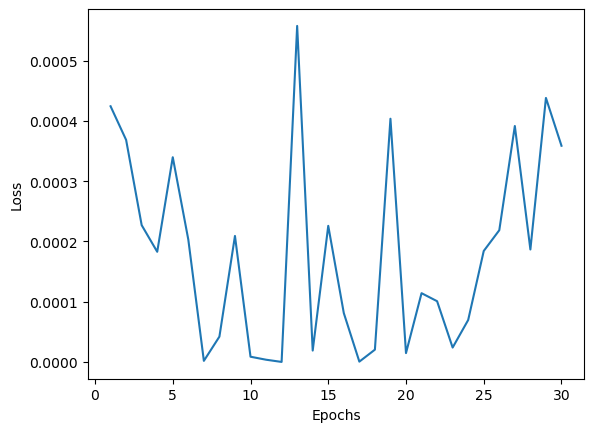

In [10]:
# Training Loop
loss_values = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)


        outputs = model(images)
        loss = criterion(outputs , labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss =+ loss.item()*images.size(0)


        if (i+1) % (n_total_steps/5) ==0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
    loss_values.append(running_loss/len(training_dataset))

epoch_vec = np.arange(num_epochs)+1
plt.plot(epoch_vec, loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
print('Finished Training')
#PATH = './cnn.pth'
#torch.save(model.state_dict(), PATH)
PATH = './cnn.pth'
torch.save(model, PATH)

In [167]:
'''
dataiter = iter(test_loader)
images, labels = dataiter.next()


imshow(torchvision.utils.make_grid(images))
print(labels)
'''
# Performance evaluation (Test dataset)
print('Test dataset accuracy')
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(9)]
    n_class_samples = [0 for i in range(9)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)


        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted ==labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0*n_correct/ n_samples
    print(f'Accuracy of the network: {acc} %')


    for i in range(9):
        acc = 100.0*n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

# Performance evaluation (Validate dataset)
print('Validate dataset accuracy')
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(9)]
    n_class_samples = [0 for i in range(9)]
    for images, labels in validate_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)


        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted ==labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0*n_correct/ n_samples
    print(f'Accuracy of the network: {acc} %')


    for i in range(9):
        acc = 100.0*n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Test dataset accuracy
Accuracy of the network: 79.22222222222223 %
Accuracy of Black Sea Sprat: 78.5 %
Accuracy of Gilt-Head Bream: 67.5 %
Accuracy of Hourse Mackerel: 54.5 %
Accuracy of Red Mullet: 83.0 %
Accuracy of Red Sea Bream: 91.0 %
Accuracy of Sea Bass: 95.0 %
Accuracy of Shrimp: 100.0 %
Accuracy of Striped Red Mullet: 58.0 %
Accuracy of Trout: 85.5 %
Validate dataset accuracy
Accuracy of the network: 82.66666666666667 %
Accuracy of Black Sea Sprat: 85.0 %
Accuracy of Gilt-Head Bream: 75.5 %
Accuracy of Hourse Mackerel: 76.5 %
Accuracy of Red Mullet: 95.0 %
Accuracy of Red Sea Bream: 82.0 %
Accuracy of Sea Bass: 94.5 %
Accuracy of Shrimp: 100.0 %
Accuracy of Striped Red Mullet: 87.0 %
Accuracy of Trout: 48.5 %
